In [1]:
import numpy as np
import pandas as pd
from plotnine import *
import math
%matplotlib inline

# Step 1

In [3]:
experiments = 100
time = 50
fish_data = []
for i in range(experiments):
    fish_pop = 2000000
    fish = [2000000]
    for i in range(time):
        big = np.random.normal(150000, 50000)
        big2 = np.random.normal(150000, 50000)
        small = np.random.normal(60000, 20000)
        small2 = np.random.normal(60000, 20000)
        fish_pop -= (big+small+big2+small2)
        if(fish_pop > 0):
            fish_growth = round(np.random.normal(fish_pop*0.25, fish_pop*0.05))
            if((fish_pop + fish_growth) > 2000000):
                fish_pop = 2000000
            else:
                fish_pop += fish_growth
        else:
            fish_pop = 0
        fish.append(fish_pop)
    fish_data.append(fish)

In [4]:
df = pd.DataFrame(np.transpose(fish_data))
df["time"] = np.linspace(0, time, time + 1)
dfm = pd.melt(df, id_vars=["time"], value_vars=range(100))

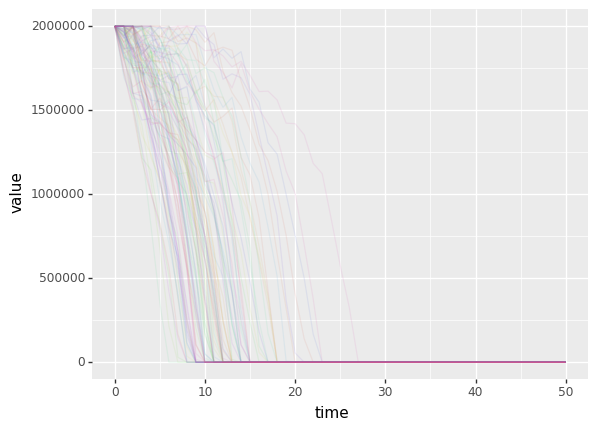

<ggplot: (94489410732)>

In [5]:
ggplot(dfm, aes(x = "time", y = "value", color="variable")) \
+ geom_line(alpha=0.1) \
+ theme(legend_position="none") 

On average it looks like it takes about 13 years for the fish population to have completely died out due to over fishing.

# Step 2

In [12]:
experiments = 100
time = 50
fish_data = []
fish_gone = 0
for i in range(experiments):
    fish_pop = 2000000
    fish = [2000000]
    for i in range(time):
        big = np.random.normal(150000, 50000)
        big2 = np.random.normal(150000, 50000)
        small = np.random.normal(60000, 20000)
        small2 = np.random.normal(60000, 20000)
        if(big > 120000):
            big = 120000
        if(big2 > 120000):
            big2 = 120000
        fish_pop -= (big+small+big2+small2)
        if(fish_pop > 0):
            fish_growth = round(np.random.normal(fish_pop*0.25, fish_pop*0.05))
            if((fish_pop + fish_growth) > 2000000):
                fish_pop = 2000000
            else:
                fish_pop += fish_growth
        else:
            fish_pop = 0
        fish.append(fish_pop)
    if(fish_pop == 0):
        fish_gone += 1
    fish_data.append(fish)

In [13]:
df = pd.DataFrame(np.transpose(fish_data))
df["time"] = np.linspace(0, time, time + 1)
dfm = pd.melt(df, id_vars=["time"], value_vars=range(100))

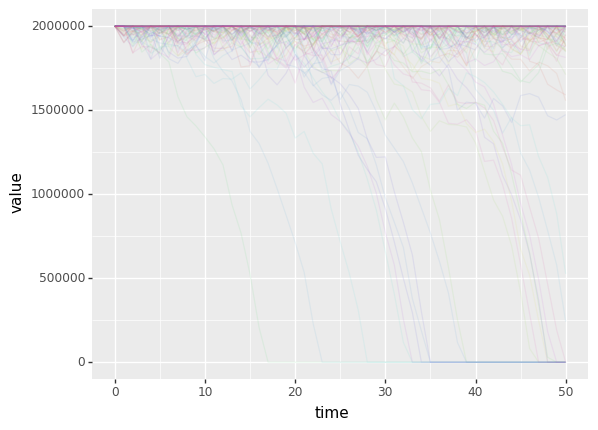

<ggplot: (94491322612)>

In [14]:
ggplot(dfm, aes(x = "time", y = "value", color="variable")) \
+ geom_line(alpha=0.1) \
+ theme(legend_position="none") 

From my testings of different limits imposed on the fishing companies it seems as though setting a hard limit of 120000 fish per company on average leads to no cases of complete overfishing of the specific species of fish, which means that the fishing can then continue on for many more years than if the limit was higher or nonexistant letting the companies maximize their earnings each year because there are still fish to catch.